In [ ]:
!pip install ultralytics
!pip install wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 793.6/793.6 kB 6.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="FH9GrrTUIrnVuHJnXAX0")
project = rf.workspace("prawns").project("-prawn-morphotypes")
dataset = project.version(4).download("yolov5")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.9 MB/s eta 0:00:00
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
      Successfully uninstalled chardet-5.2.0
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to 'prawn-morphotypes'-4 in yolov5pytorch:: 100%|██████████| 536/536 [00:00<00:00, 6674.37it/s]


In [ ]:
import wandb
run = wandb.init()
artifact = run.use_artifact('prawns/measurement paper/yolov8-only_31.12_-segment_segment.pt:v31', type='model')
artifact_dir = artifact.download()

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


wandb: Downloading large artifact yolov8-only_31.12_-segment_segment.pt:v31, 263.64MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:18.0


In [ ]:
from YOLOtowandb import WandbCallback

from pathlib import Path
import wandb
import re

from ultralytics import YOLO

# Load a COCO-pretrained RT-DETR-l model
import wandb


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import importlib
import YOLOtowandb

importlib.reload(YOLOtowandb)

<module 'yolov8l16' from '/content/yolov8l16.py'>

In [ ]:
model = YOLO("yolov8l-pose.pt")  # load a pretrained model (recommended for training)


100%|██████████| 137M/137M [00:00<00:00, 322MB/s]


In [ ]:

wandb_logger = WandbCallback(
        model,project='measurement paper',run_name='yolov8-right_keypoint',tags=['keypoint','yolov8l-pose.pt']
    )

for event, callback_fn in wandb_logger.callbacks.items():
    model.add_callback(event, callback_fn)

## train notice yaml addresses ##

In [ ]:
model.train(data="/content/drive/MyDrive/colab experiments/to colab only 31-12 segment with 76/data.yaml", epochs=300, imgsz=640, seed=42,batch=8,patience=50)


In [ ]:
model = YOLO("/content/runs/segment/train/weights/best.pt")  # load a custom trained model

# Export the model
model.export(format="onnx")

Ultralytics YOLOv8.2.43 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8x-seg summary (fused): 295 layers, 71721619 parameters, 0 gradients, 343.7 GFLOPs

PyTorch: starting from '/content/runs/segment/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) ((1, 37, 8400), (1, 32, 160, 160)) (137.3 MB)
requirements: Ultralytics requirement ['onnx>=1.12.0'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 73.0 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 15.4s, installed 1 package: ['onnx>=1.12.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.16.1 opset 17...
ONNX: export success ✅ 30.8s, saved as '/content/runs/segment/train/weights/best.onnx' (273.8 MB)

Export complete (48.8s)
Results saved to /content/runs/segment/train/weights
Predict:         yolo predict task=segment model=/content/runs/segment/train/weights/best.onnx

'/content/runs/segment/train/weights/best.onnx'

In [1]:
from ultralytics import YOLO    


#model predict
model = YOLO(r"C:\Users\gbo10\OneDrive\measurement_paper_images\weights- 28.08\right.pt")  # load a custom trained model

#predict
model.predict(source=r"C:\Users\gbo10\OneDrive\measurement_paper_images\images used for imageJ\check\stabilized\shai\measurements/1\carapace\right\undistorted_GX010097_60_1080.jpg_gamma.jpg" ,save=True,save_txt=True,show_boxes=False,imgsz=(5312, 2988), conf=0.3)


WARNING  imgsz=[5312, 2988] must be multiple of max stride 32, updating to [5312, 3008]
image 1/1 C:\Users\gbo10\OneDrive\measurement_paper_images\images used for imageJ\check\stabilized\shai\measurements\1\carapace\right\undistorted_GX010097_60_1080.jpg_gamma.jpg: 1696x3008 (no detections), 11296.1ms
Speed: 82.8ms preprocess, 11296.1ms inference, 5.0ms postprocess per image at shape (1, 3, 1696, 3008)
Results saved to c:\Users\gbo10\Videos\data-science\Research-counting-algorithms\runs\pose\predict31
0 label saved to c:\Users\gbo10\Videos\data-science\Research-counting-algorithms\runs\pose\predict31\labels


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: ultralytics.engine.results.Keypoints object
 masks: None
 names: {0: 'prawn-model'}
 obb: None
 orig_img: array([[[123,  87,  17],
         [122,  87,  13],
         [122,  90,   7],
         ...,
         [ 89,  75,  77],
         [ 86,  72,  74],
         [ 85,  71,  73]],
 
        [[120,  83,  15],
         [118,  83,  10],
         [119,  86,   6],
         ...,
         [ 87,  73,  75],
         [ 83,  69,  71],
         [ 82,  68,  70]],
 
        [[120,  82,  17],
         [117,  81,  11],
         [119,  85,   9],
         ...,
         [ 86,  72,  74],
         [ 83,  69,  71],
         [ 81,  67,  69]],
 
        ...,
 
        [[ 47,   0,  50],
         [ 47,   0,  49],
         [ 46,   0,  47],
         ...,
         [159, 142,  99],
         [158, 142, 100],
         [158, 142, 100]],
 
        [[ 49,   2,  51],
         [ 47,   2,  51],
         [ 46,

Loaded 4 predictions.
Image loaded: C:\Users\gbo10\OneDrive\measurement_paper_images\images used for imageJ\check\stabilized\shai\measurements/1\carapace\right\undistorted_GX010082_236_3137.jpg_gamma.jpg


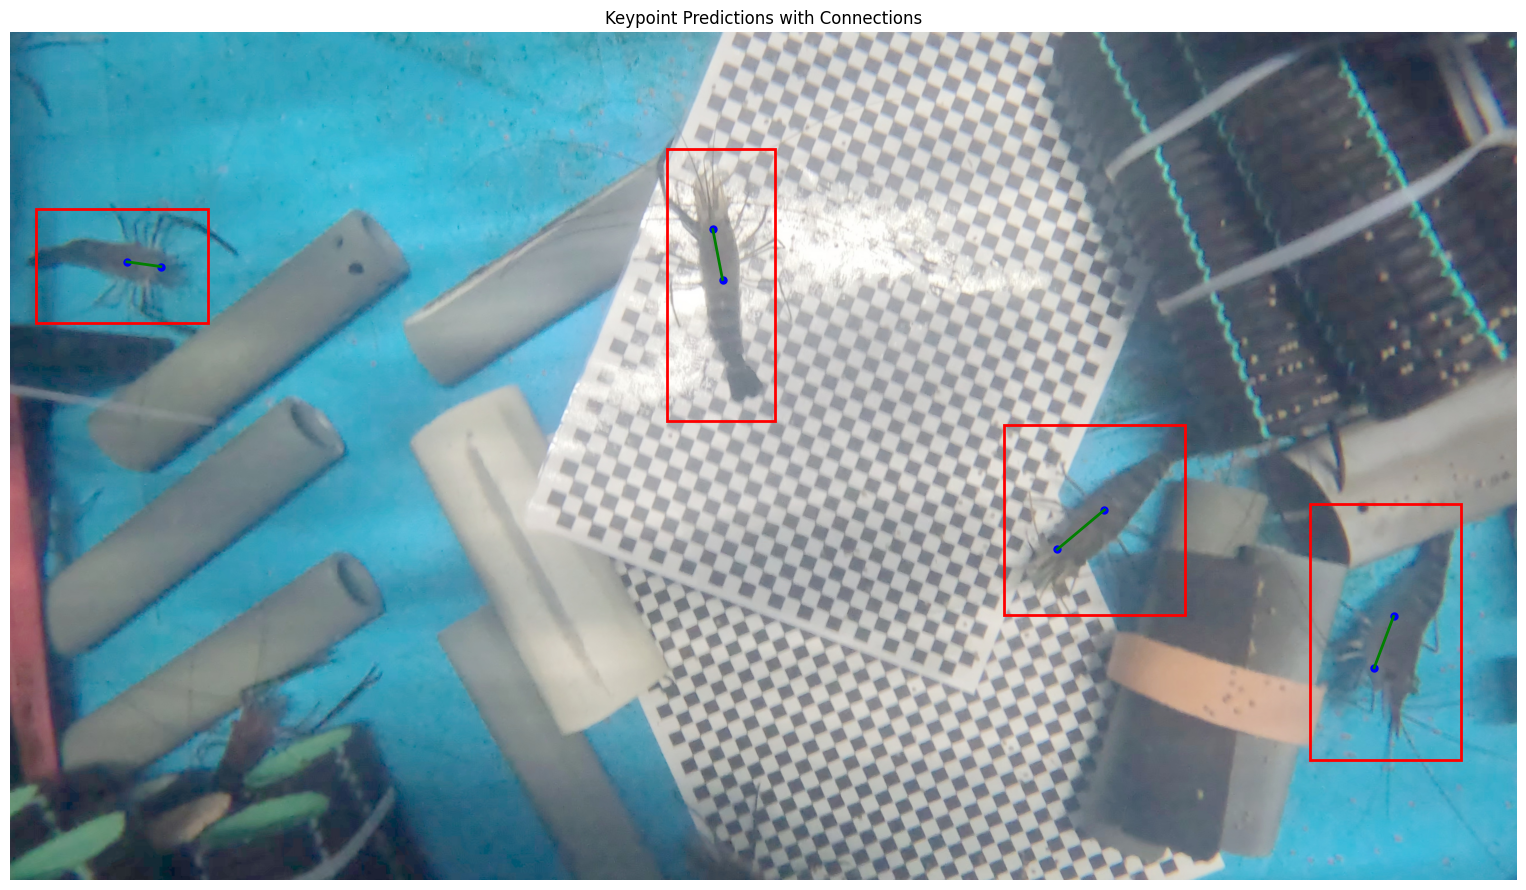

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

def plot_keypoints(image_path, predictions, conf_threshold=0.5):
    # Load the image
    try:
        image = Image.open(image_path)
        print(f"Image loaded: {image_path}")
    except Exception as e:
        print(f"Error loading image: {e}")
        return
    
    plt.figure(figsize=(16, 9))  # Adjusted for 5312x2988 aspect ratio
    plt.imshow(image)
    
    for pred in predictions:
        class_id, x, y, w, h, *keypoints = pred
        
        # Draw bounding box
        rect = plt.Rectangle((x * image.width - w * image.width / 2, y * image.height - h * image.height / 2), 
                             w * image.width, h * image.height, fill=False, edgecolor='red', linewidth=2)
        plt.gca().add_patch(rect)
        
        # Draw keypoints and connect them
        if len(keypoints) >= 6:
            kp1_x, kp1_y, kp1_conf = keypoints[0:3]
            kp2_x, kp2_y, kp2_conf = keypoints[3:6]
            
            if kp1_conf > conf_threshold and kp2_conf > conf_threshold:
                plt.plot(kp1_x * image.width, kp1_y * image.height, 'o', color='blue', markersize=5)
                plt.plot(kp2_x * image.width, kp2_y * image.height, 'o', color='blue', markersize=5)
                
                # Draw line between keypoints
                plt.plot([kp1_x * image.width, kp2_x * image.width],
                         [kp1_y * image.height, kp2_y * image.height],
                         '-', color='green', linewidth=2)
    
    plt.title('Keypoint Predictions with Connections')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Load predictions from the text file
predictions = []
try:
    with open(r"C:\Users\gbo10\Videos\data-science\Research-counting-algorithms\runs\pose\predict27\labels\GX010082_236_3137-jpg_gamma_jpg.rf.dfa0794c8be9bb506588bc0e712bd745.txt", 'r') as f:
        for line in f:
            predictions.append([float(x) for x in line.strip().split()])
    print(f"Loaded {len(predictions)} predictions.")
except Exception as e:
    print(f"Error reading predictions: {e}")

# Specify the path to the image you want to display
image_path = r"C:\Users\gbo10\OneDrive\measurement_paper_images\images used for imageJ\check\stabilized\shai\measurements/1\carapace\right\undistorted_GX010082_236_3137.jpg_gamma.jpg"  # Replace with your actual image path

# Plot the keypoints on the image
plot_keypoints(image_path, predictions)

Loaded 4 predictions.
Image loaded: C:\Users\gbo10\OneDrive\measurement_paper_images\images used for imageJ\check\stabilized\shai\measurements/1\carapace\right\undistorted_GX010082_236_3137.jpg_gamma.jpg


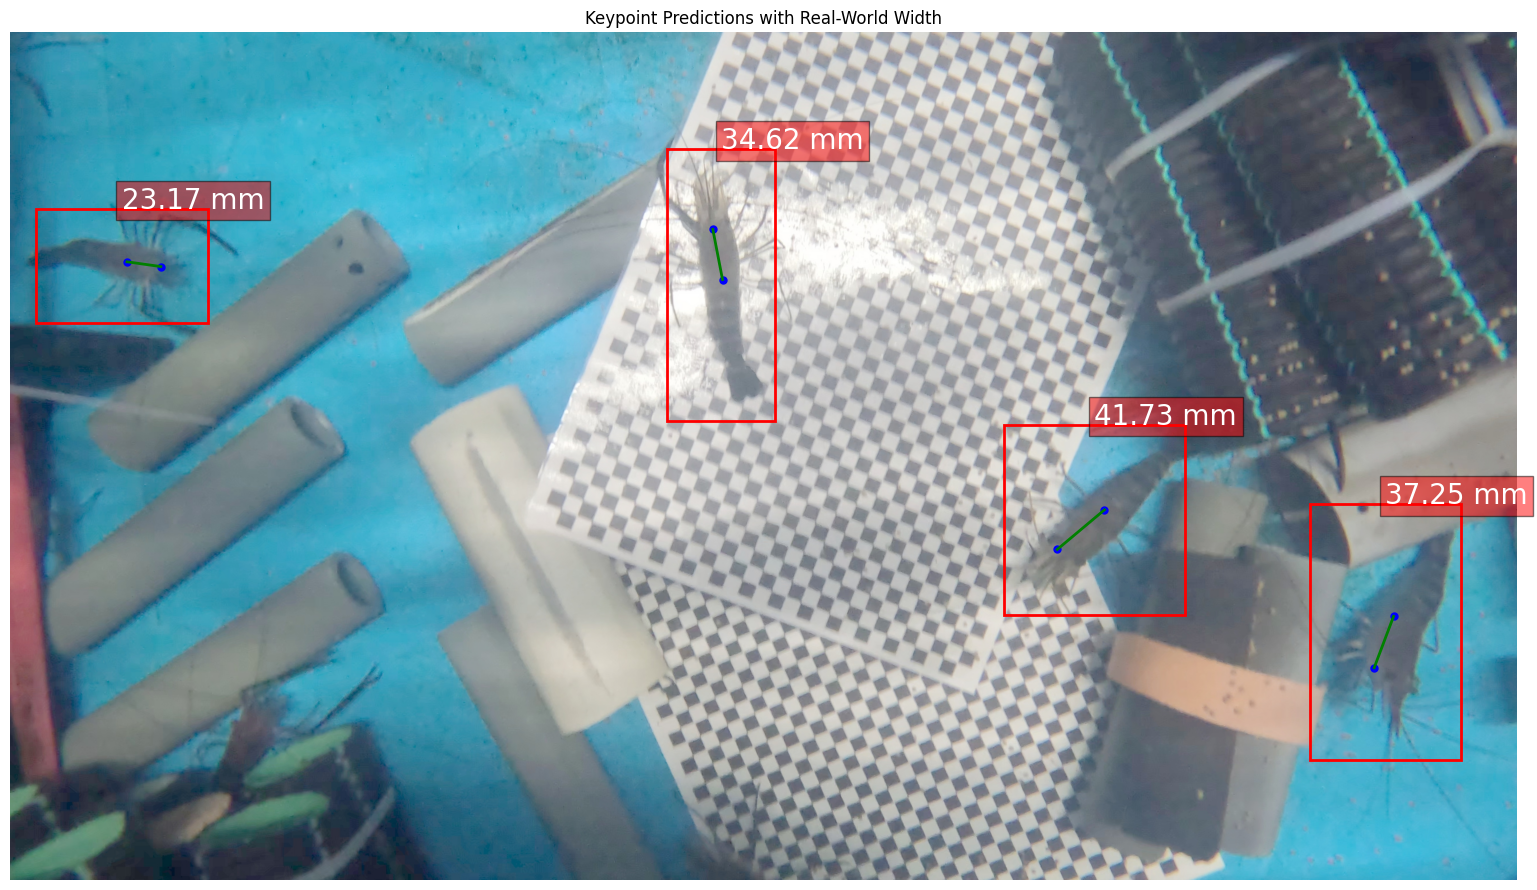

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import math

def calculate_real_width(focal_length, distance_to_object, width_in_pixels, pixel_size):
    width_in_sensor = width_in_pixels * pixel_size
    real_width_mm = (width_in_sensor * distance_to_object) / focal_length
    return real_width_mm

def euclidean_distance(x1, y1, x2, y2):
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

def plot_keypoints(image_path, predictions, conf_threshold=0.5):
    try:
        image = Image.open(image_path)
        print(f"Image loaded: {image_path}")
    except Exception as e:
        print(f"Error loading image: {e}")
        return
    
    plt.figure(figsize=(16, 9))
    plt.imshow(image)
    
    # Camera parameters (you may need to adjust these)
    focal_length = 24.22  # mm
    distance_to_object = 630  # mm (5 meters)
    pixel_size = 0.00716844  # mm (assuming a typical pixel size for a 5312x2988 sensor)
    
    for pred in predictions:
        class_id, x, y, w, h, *keypoints = pred
        
        # Draw bounding box
        rect = plt.Rectangle((x * image.width - w * image.width / 2, y * image.height - h * image.height / 2), 
                             w * image.width, h * image.height, fill=False, edgecolor='red', linewidth=2)
        plt.gca().add_patch(rect)
        
        # Draw keypoints and connect them
        if len(keypoints) >= 6:
            kp1_x, kp1_y, kp1_conf = keypoints[0:3]
            kp2_x, kp2_y, kp2_conf = keypoints[3:6]
            
            if kp1_conf > conf_threshold and kp2_conf > conf_threshold:
                plt.plot(kp1_x * image.width, kp1_y * image.height, 'o', color='blue', markersize=5)
                plt.plot(kp2_x * image.width, kp2_y * image.height, 'o', color='blue', markersize=5)
                
                # Draw line between keypoints
                plt.plot([kp1_x * image.width, kp2_x * image.width],
                         [kp1_y * image.height, kp2_y * image.height],
                         '-', color='green', linewidth=2)
                
                # Calculate Euclidean distance between keypoints in pixels
                distance_pixels = euclidean_distance(kp1_x * image.width, kp1_y * image.height,
                                                     kp2_x * image.width, kp2_y * image.height)
                
                # Calculate real-world width
                real_width = calculate_real_width(focal_length, distance_to_object, distance_pixels, pixel_size)
                
                # Display real-world width next to the object
                plt.text(x * image.width, (y - h/2) * image.height, 
                         f'{real_width:.2f} mm', color='white', fontsize=20, 
                         bbox=dict(facecolor='red', alpha=0.5))
    
    plt.title('Keypoint Predictions with Real-World Width')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Load predictions from the text file
predictions = []
try:
    with open(r"C:\Users\gbo10\Videos\data-science\Research-counting-algorithms\runs\pose\predict27\labels\GX010082_236_3137-jpg_gamma_jpg.rf.dfa0794c8be9bb506588bc0e712bd745.txt", 'r') as f:
        for line in f:
            predictions.append([float(x) for x in line.strip().split()])
    print(f"Loaded {len(predictions)} predictions.")
except Exception as e:
    print(f"Error reading predictions: {e}")

# Specify the path to the image you want to display
image_path = r"C:\Users\gbo10\OneDrive\measurement_paper_images\images used for imageJ\check\stabilized\shai\measurements/1\carapace\right\undistorted_GX010082_236_3137.jpg_gamma.jpg"  # Replace with your actual image path

# Plot the keypoints on the image
plot_keypoints(image_path, predictions)